<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/Gradua%C3%A7%C3%A3o/2022/S1/20220927_Discriminantes-AnaliseGraficaClassificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv")


df.head(12)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


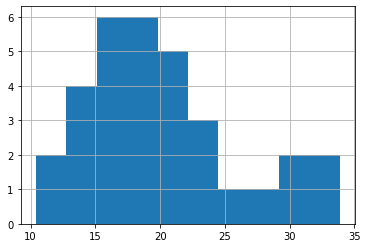

In [ ]:
df['mpg'].hist()

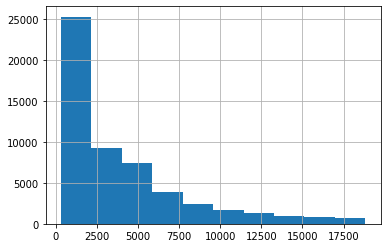

In [ ]:
import pandas as pd
import numpy as np
dfDiam = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/diamonds.csv")
dfDiam['price'].hist()

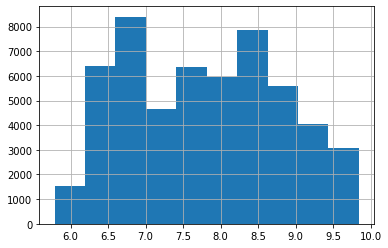

In [ ]:
# Transformação Log-Linear com objetivo de redistribuir os dados
dfDiam['price_log'] = np.log(dfDiam['price'])
dfDiam['price_log'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5801229690>],
      dtype=object)

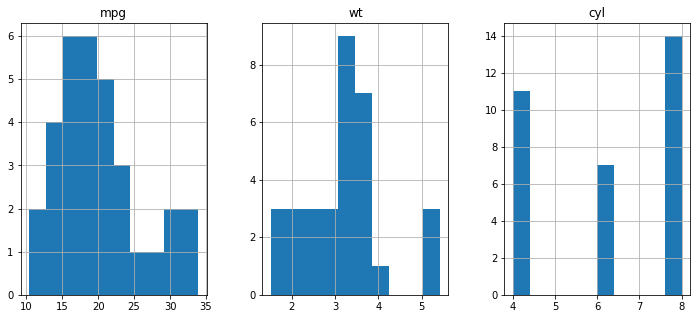

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)

fig, axes = plt.subplots(1, 3)

df.hist('mpg', ax=axes[0])
df.hist('wt', ax=axes[1])
df.hist('cyl', ax=axes[2])

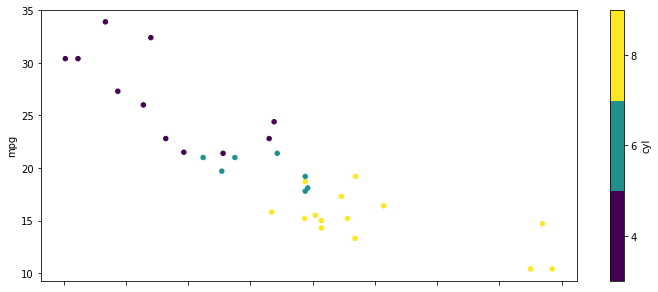

In [ ]:
#Gráfico de dispersão entre mpg e wt, identificando os veículos de 4, 6 e 8 cilindros
df['cyl'] = df['cyl'].astype('category')
df.plot.scatter(x="wt", y="mpg",c="cyl", colormap='viridis')

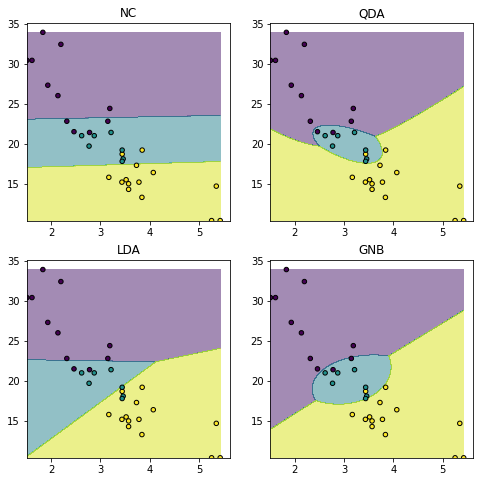

In [ ]:
# Definição das variáveis Y e X (alvo e preditoras)
X = df[['wt', 'mpg']]
y = df['cyl']

# Bloco de configuração da janela gráfica - método mesg grid é útil para marcar com cores uma região
x_min = df['wt'].min()
x_max = df['wt'].max()
y_min = df['mpg'].min()
y_max = df['mpg'].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Carga das bibliotecas utilizadas pelos 4 classificadores
from sklearn import neighbors, discriminant_analysis, naive_bayes

# Repare que os classificadores LDA e QDA fazem parte da mesma biblioteca
# porém são métodos diferentes
# A definição abaixo é somente a construção de um objeto ordenado para,
# posteriormente, invocar os 4 métodos
classifiers = [
    neighbors.NearestCentroid(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    naive_bayes.GaussianNB()
]
classifier_names = ['NC', 'LDA', 'QDA', 'GNB']

# Carga da biblioteca matplotlib e configuração da janela gráfica
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(8,8))

# Laço que será executado 4x para:
#   1. Construção do modelo com método .fit
#   2. Aplicação do método predict para uso do modelo
#   3. Métodos para configuração da janela gráfica
for idx, clf in enumerate(classifiers):
    clf.fit(X.values, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax[idx % 2][int(idx/2)].set_title(classifier_names[idx])
    ax[idx % 2][int(idx/2)].contourf(xx, yy, Z, alpha=.5)
    ax[idx % 2][int(idx/2)].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')

# E por fim, a exibição do gráfico
plt.savefig('classifiers_1.png') 

In [ ]:
# Carga das bibliotecas utilizadas pelos 4 classificadores
from sklearn import neighbors, discriminant_analysis, naive_bayes 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Repare que os classificadores LDA e QDA fazem parte da mesma biblioteca
# posteriormente, invocar os 4 métodos
classifiers = [
    neighbors.NearestCentroid(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    naive_bayes.GaussianNB()
]
classifier_names = ['NC', 'LDA', 'QDA', 'GNB']

# Separação das amostras
X_train, X_test, Y_train, Y_test = train_test_split( df[['wt','mpg']], df['cyl'], test_size=0.25, random_state=33 )

# Laço que será executado 4x para:
#   1. Construção do modelo com método .fit
#   2. Aplicação do método predict para uso do modelo
#   3. Avalicão de acurácia
for idx, clf in enumerate(classifiers):
    clf.fit(X_train.values, Y_train)


    Y_prev = clf.predict(X_test.values)
    print(classifier_names[idx], ' => acurácia= ', accuracy_score(Y_test, Y_prev))


NC  => acurácia=  0.75
LDA  => acurácia=  0.75
QDA  => acurácia=  0.875
GNB  => acurácia=  0.75
